# Exercise 1: Multi-Layered Scatter Plot with Marginal Histograms

## Objective:

Create a multi-layered scatter plot using plotnine that includes marginal histograms to visualize the distribution of two continuous variables.
Instructions

  1.  Choose a dataset with at least two continuous variables (e.g., the Iris dataset).
  2.  Load your dataset into a pandas DataFrame.
  3.  Import the necessary components from plotnine.
  4. Create a scatter plot mapping the two continuous variables to the x and y axes.
  5. Overlay this plot with marginal histograms along both the x and y axes to show the distribution of each variable.
  6. Customize the plot with titles, labels, and a color scheme that enhances data interpretation.
  7. Display the plot.


In [1]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *
import plotly.express as px
import plotly.subplots as sp

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


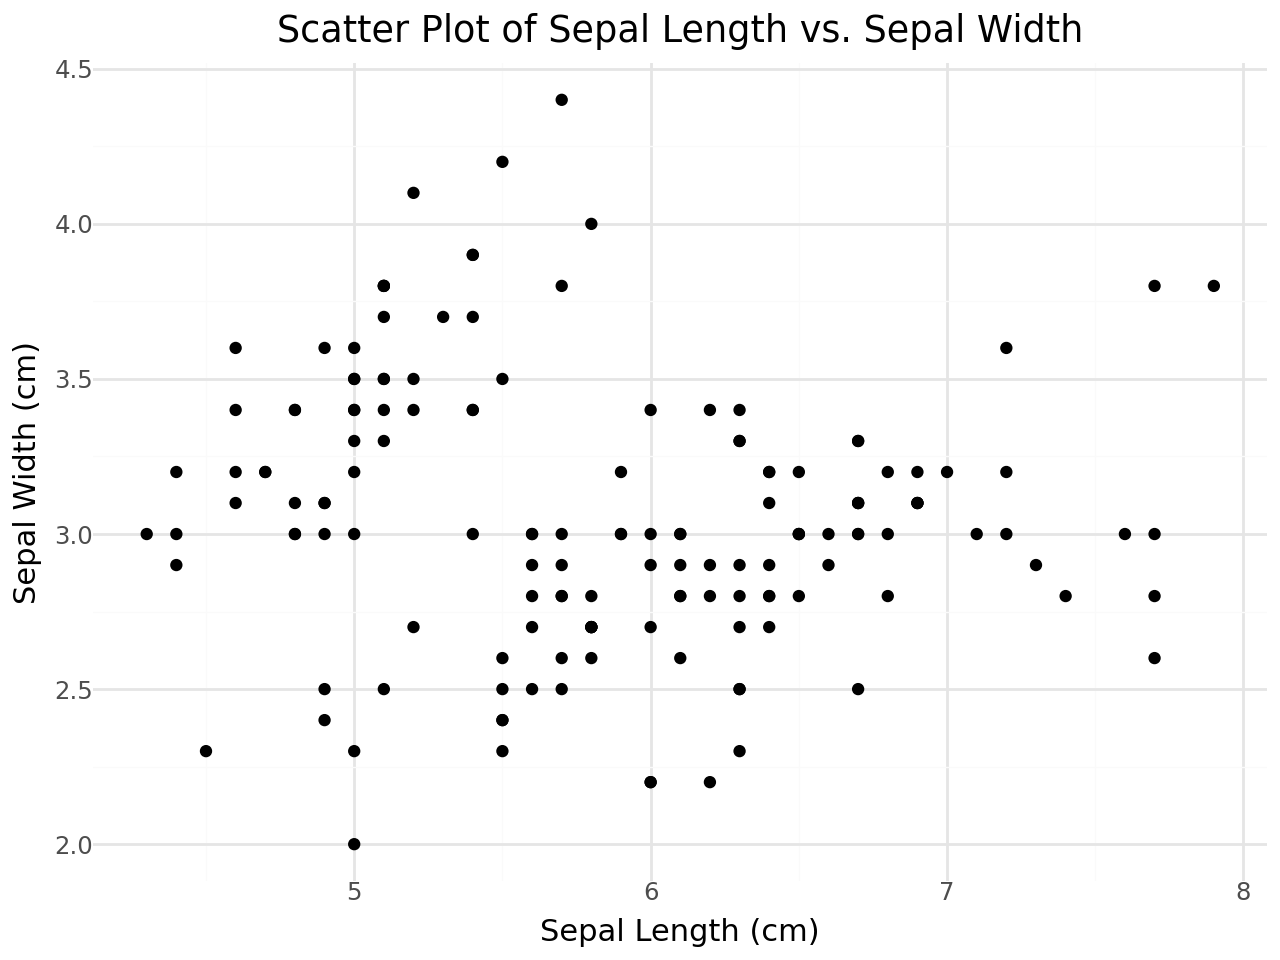

In [3]:
plot = (ggplot(df, aes(x='sepal length (cm)', y='sepal width (cm)'))
 + geom_point()  # need adding scatter plot geometry
 + labs(title="Scatter Plot of Sepal Length vs. Sepal Width",
        x="Sepal Length (cm)", y="Sepal Width (cm)")
 + theme_minimal()
 )

plot

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.


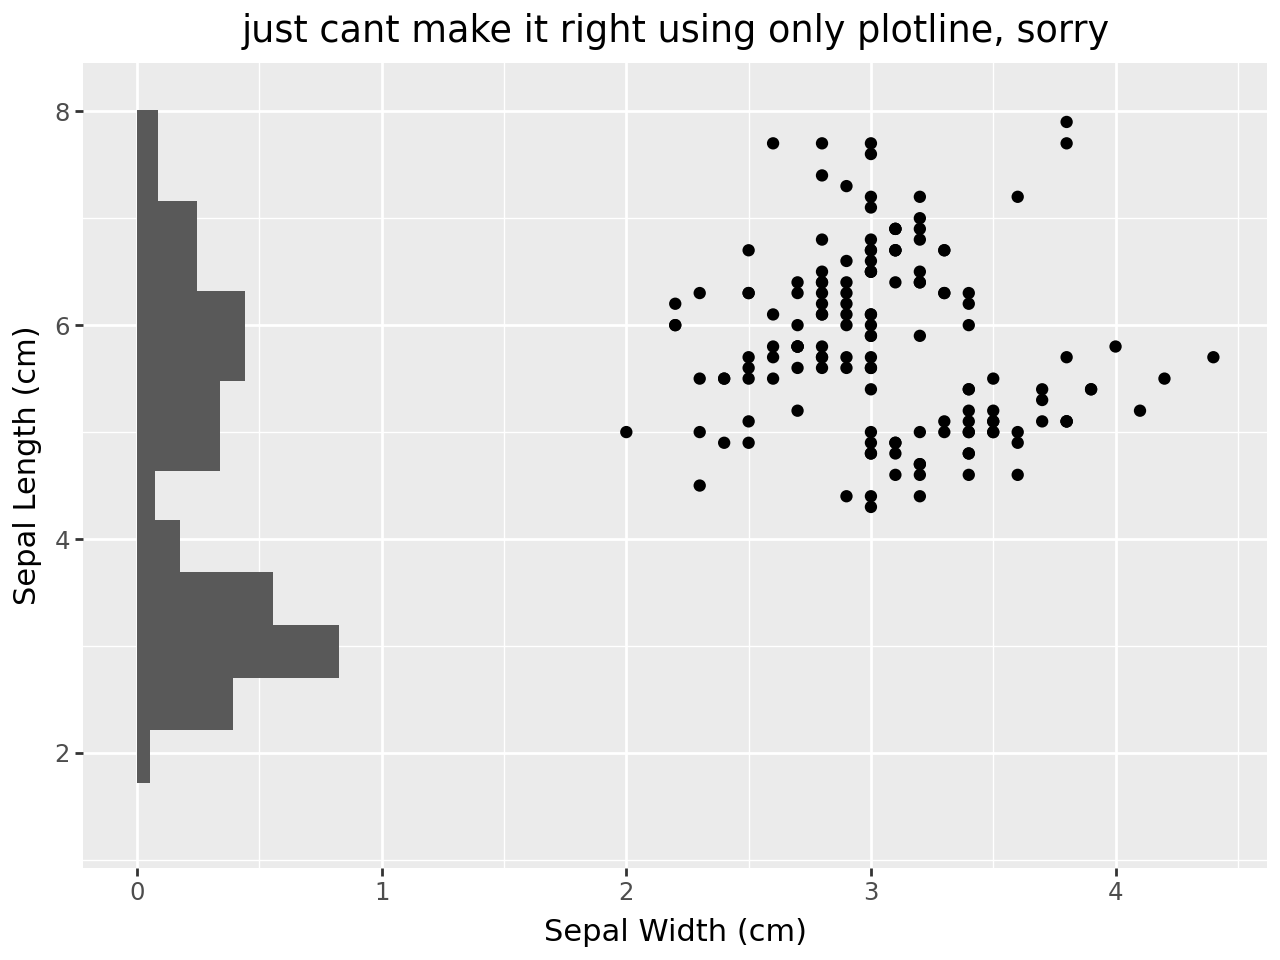

In [4]:
(ggplot(df, aes(x='sepal length (cm)', y='sepal width (cm)'))
 + geom_point()
 + geom_histogram(aes(x='sepal length (cm)', y='..density..'))
 + geom_histogram(aes(x='sepal width (cm)', y='..density..'))
 + coord_flip()
 + labs(title="just cant make it right using only plotline, sorry", x="Sepal Length (cm)", y="Sepal Width (cm)")
)


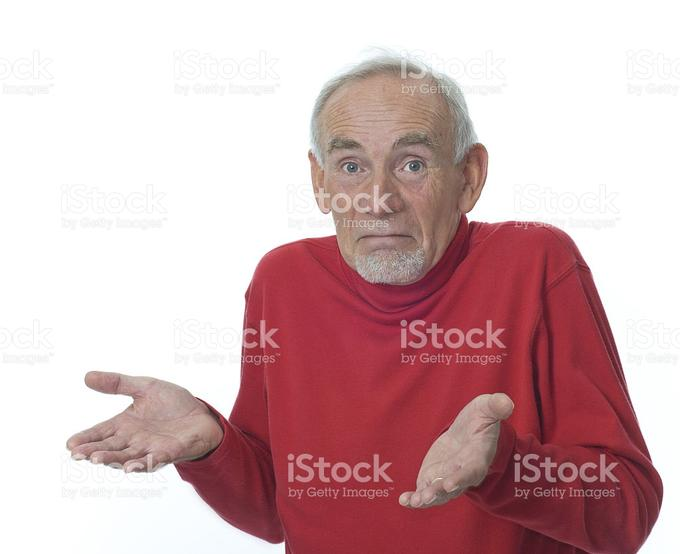

# Exercise 2: Interactive Facet Grid with Conditional Elements

## Objective:

Use plotnine to create an interactive facet grid that displays different types of plots (scatter plot, line plot, etc.) based on a categorical variable in the dataset.
Instructions

* Select a dataset with both categorical and continuous variables.
* Load the dataset into a pandas DataFrame.
* Import plotnine and other necessary libraries.
* Create a facet grid that segments your data by the categorical variable.
Within each facet, implement a conditional statement that chooses the type of plot (scatter, line, etc.) based on the specific subset of data.
* Ensure interactivity, such as tooltips or hover information, where applicable.
* Customize the plot with appropriate titles, axis labels, and a legend.


In [5]:
# categorize sepal length so we have categrical data
df['sepal_length_category'] = pd.cut(df['sepal length (cm)'], bins=[0, 5, 10, 15, 20], labels=['Short', 'Medium', 'Long', 'Very Long'])

In [6]:
df_sorted = df.sort_values(by='sepal length (cm)')

# function to create plots based on category
def create_plot(category):
    '''
    decides plot based on category
    '''
    subset = df_sorted[df_sorted['sepal_length_category'] == category]

    # choose plot type based on category
    if category == 'Short':
        fig = px.scatter(subset, x='sepal length (cm)', y='sepal width (cm)',
                         labels={'sepal length (cm)': 'Sepal Length (cm)',
                                 'sepal width (cm)': 'Sepal Width (cm)'},
                         hover_data=['sepal length (cm)', 'sepal width (cm)'])
    elif category == 'Medium':
        fig = px.line(subset, x='sepal length (cm)', y='sepal width (cm)',
                      labels={'sepal length (cm)': 'Sepal Length (cm)',
                              'sepal width (cm)': 'Sepal Width (cm)'},
                      hover_data=['sepal length (cm)', 'sepal width (cm)'])

    else:  # For 'Long' and 'Very Long'
        # count occurrences of each category
        count_data = df['sepal_length_category'].value_counts().reset_index()
        count_data.columns = ['sepal_length_category', 'count']

        fig = px.bar(count_data, x='sepal_length_category', y='count',
                     labels={'sepal_length_category': 'Sepal Length Category',
                             'count': 'Count'},
                     hover_data=['count'])

    return fig

# Create a list of categories to plot
categories = df['sepal_length_category'].cat.categories

# Create subplots for each category
fig = sp.make_subplots(rows=2, cols=2,
                        subplot_titles=[f'plot for {category} sepal' for category in categories])

# Loop through each category and add the corresponding plot to the subplot
for i, category in enumerate(categories):
    row = i // 2 + 1  # Determine row number (1-indexed)
    col = i % 2 + 1   # Determine column number (1-indexed)
    fig.update_xaxes(title_text='Sepal Length (cm)', row=row, col=col)
    fig.update_yaxes(title_text='Sepal Width (cm)', row=row, col=col)

    # Create the plot for the current category
    plot_fig = create_plot(category)

    # Add traces from the plot to the subplot
    for trace in plot_fig.data:
        fig.add_trace(trace, row=row, col=col)

# Update layout for better presentation
fig.update_layout(title_text="nobody reads the titles", height=600)

# Exercise 3: Time Series Analysis with Rolling Averages and Confidence Intervals

## Objective:

Perform a time series analysis on a dataset using plotnine by plotting rolling averages along with confidence intervals.
## Instructions

* Choose a time series dataset (e.g., stock market data, temperature over time).
* Load the dataset into a pandas DataFrame.
* Calculate the rolling average and confidence intervals for a chosen time period.
* Import plotnine and other necessary libraries.
* Plot the time series data along with the rolling averages.
* Add shaded areas to represent confidence intervals around the rolling averages.
* Customize your plot with titles, labels, and an intuitive color scheme.


In [7]:
from google.colab import output
output.enable_custom_widget_manager()

[*********************100%***********************]  1 of 1 completed


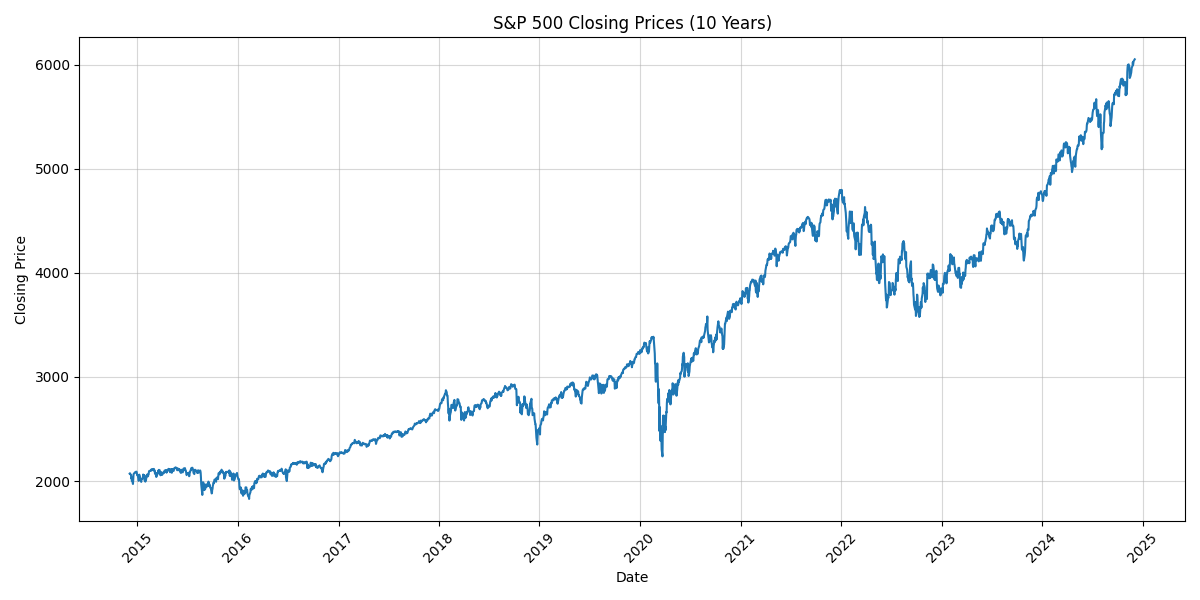

In [8]:
# !pip install ipympl
import yfinance as yf
import matplotlib.pyplot as plt

# Required for interactive plots in Jupyter Notebook
%matplotlib widget

# Download S&P 500 data for the past 10 years
data_multiIndex = yf.download("^GSPC", period="10y")

# ---------- create plot ------------
plt.figure(figsize=(12, 6))
plt.plot(data_multiIndex.index, data_multiIndex['Close'])

# customize plot
plt.title('S&P 500 Closing Prices (10 Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
print('## the data has MultiIndex and have to be removed:')
print(data_multiIndex.head())
print()

# need to store the 'Date' index as a new column before flattening so we dont loose it
data_multiIndex['date_time'] = data_multiIndex.index

# Flatten the MultiIndex columns
data = data_multiIndex.copy() # just in case to avoifd modifying the original
data.columns = [' '.join(col).strip() for col in data_multiIndex.columns.values]

# Reset index to make sure Date_ is a column ?????????
data.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print('## new dataframe flattened index:')
print(data.head())

## the data has MultiIndex and have to be removed:
Price                        Adj Close        Close         High          Low  \
Ticker                           ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                            
2014-12-04 00:00:00+00:00  2071.919922  2071.919922  2077.340088  2062.340088   
2014-12-05 00:00:00+00:00  2075.370117  2075.370117  2079.469971  2070.810059   
2014-12-08 00:00:00+00:00  2060.310059  2060.310059  2075.780029  2054.270020   
2014-12-09 00:00:00+00:00  2059.820068  2059.820068  2060.600098  2034.170044   
2014-12-10 00:00:00+00:00  2026.140015  2026.140015  2058.860107  2024.260010   

Price                             Open      Volume  
Ticker                           ^GSPC       ^GSPC  
Date                                                
2014-12-04 00:00:00+00:00  2073.639893  3408340000  
2014-12-05 00:00:00+00:00  2072.780029  3419620000  
2014-12-08 00:00:00+00:00  2074.840

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:99: PlotnineWarning:

geom_path: Removed 59 rows containing missing values.



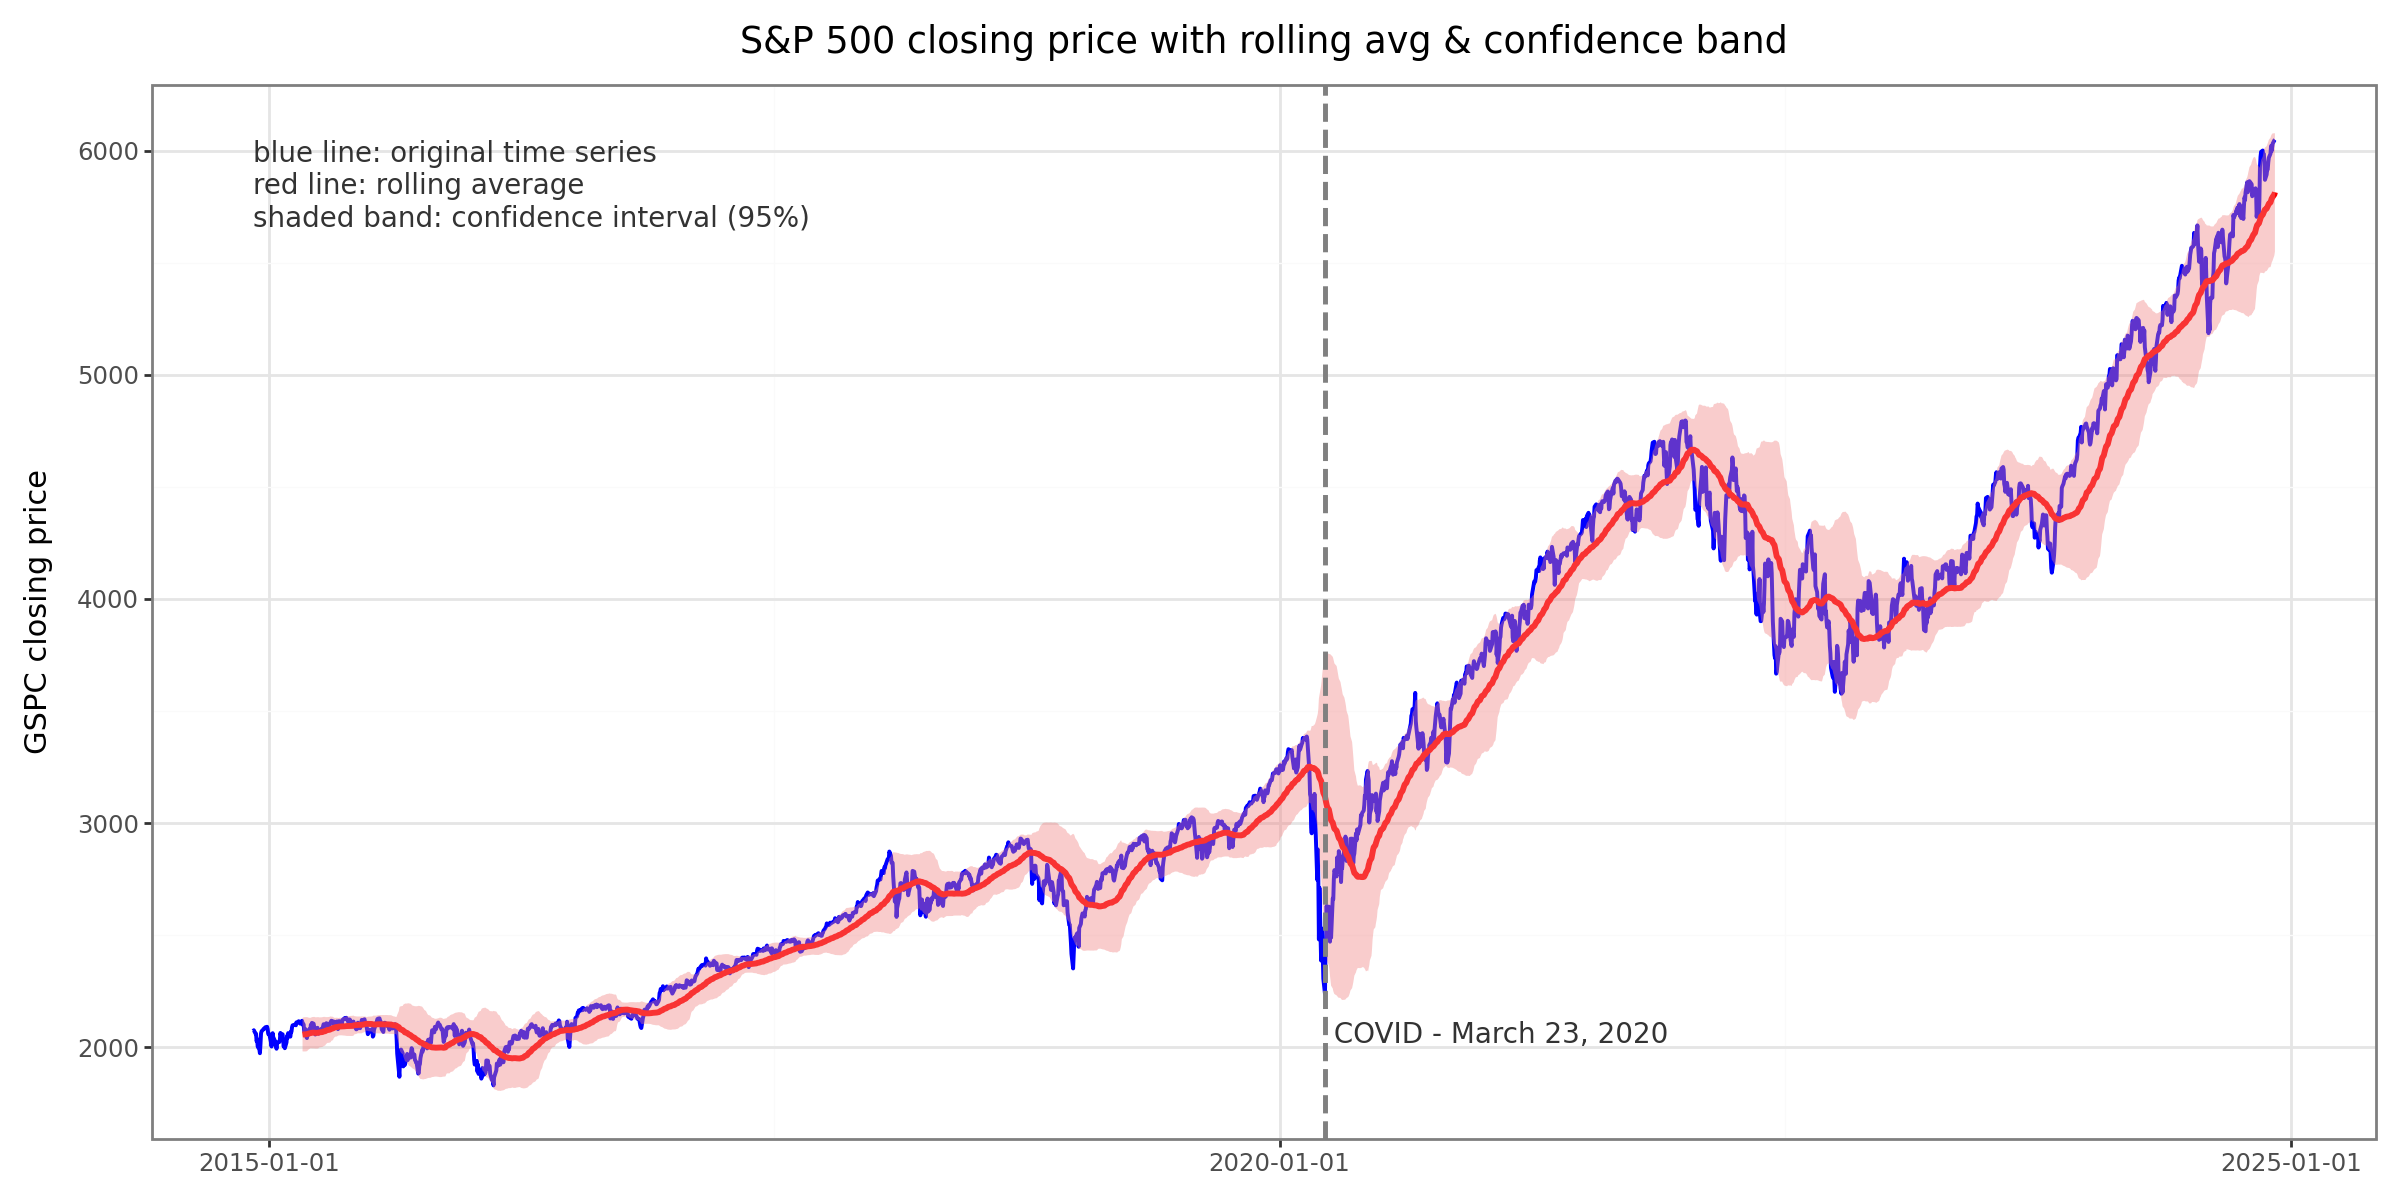

In [10]:
from plotnine import annotate

# text box content
legend_text = (
    'blue line: original time series\n'
    'red line: rolling average\n'
    'shaded band: confidence interval (95%)'
)

# rolling average and confidence intervals
rolling_window = 60

data['rolling_mean'] = data['Close ^GSPC'].rolling(window=rolling_window).mean()
data['rolling_std'] = data['Close ^GSPC'].rolling(window=rolling_window).std()
data['upper_bound'] = data['rolling_mean'] + 2 * data['rolling_std']  # 95% CI
data['lower_bound'] = data['rolling_mean'] - 2 * data['rolling_std']


# the plot
plot = (
    ggplot(data, aes(x='date_time'))

    # individual plots
    + geom_line(aes(y='Close ^GSPC'), color='blue', size=0.8)   # original time series
    + geom_line(aes(y='rolling_mean'), color='red', size=1.2)   # rolling average
    + geom_ribbon(                                              # confidence interval
                  aes(ymin='lower_bound', ymax='upper_bound'),
                  fill='lightcoral', alpha=0.4
    )

    # labels
    + labs(
        title='S&P 500 closing price with rolling avg & confidence band',
        x='',
        y='GSPC closing price'
    )

    # attempt of box legend
    + annotate(
        'text',
        x=data['date_time'].iloc[0],  # Changed to first date for upper left
        y=data['Close ^GSPC'].max(),
        label=legend_text,
        ha='left',  # Changed to 'left' for left alignment
        va='top',
        size=10,
        color='black',
        alpha=0.8,
    )

    # vertical line at minimum
    + geom_vline(xintercept='2020-03-23 00:00:00+00:00',
                 linetype='dashed', color='gray', size=1)

    # second anotation
    + annotate('text',
               x='2020-03-23 00:00:00+00:00',
               y=data['Close ^GSPC'].max() * 0.35,  # y-position
               label=' COVID - March 23, 2020  ',
               ha='left', va='top',
               size=10, color='black', alpha=0.8,
               angle=0)

    + theme_bw()
    + theme(figure_size=(12, 6))
)

plot


In [11]:
filtered_data = data[data['date_time'] > '2020-01-01']
min_close_row = filtered_data.loc[filtered_data['Close ^GSPC'].idxmin()]

min_date_time = min_close_row['date_time']
min_close_value = min_close_row['Close ^GSPC']

print(min_date_time)

2020-03-23 00:00:00+00:00
